SEGNET MODEL 

IMPORTING DEPENDENCIES

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

LOADING IMAGES

In [31]:
IMG_WIDTH = 256
IMG_HEIGHT = 256

def load_images(image_folder, mask_folder):
    images = []
    masks = []

    # List of image and mask files
    image_files = sorted(os.listdir(image_folder))
    mask_files = sorted(os.listdir(mask_folder))

    print(f"Image Files: {image_files}")
    print(f"Mask Files: {mask_files}")

    # Iterate through image and mask files
    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(image_folder, img_file)
        mask_path = os.path.join(mask_folder, mask_file)

        # Read and resize the image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Use IMREAD_COLOR for 3-channel images
        if img is None:
            print(f"Failed to read image {img_file}.")
            continue
        
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # Resize image
        img = img / 255.0  # Normalize the image to [0, 1]

        # Read and resize the mask
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Mask should be grayscale
        if mask is None:
            print(f"Failed to read mask {mask_file}.")
            continue
        
        mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))  # Resize mask
        mask = np.expand_dims(mask, axis=-1)  # Add a channel dimension to mask
        mask = mask / 255.0  # Normalize the mask to [0, 1]

        # Append image and mask to their respective lists
        images.append(img)
        masks.append(mask)

    print(f"Successfully loaded {len(images)} images and {len(masks)} masks.")
    return np.array(images), np.array(masks)

In [6]:
path_images = 'test/original_images'
path_masks = 'test/binary_images'

In [8]:
X_test,Y_test = load_images(path_images,path_masks)

Image Files: ['0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '0

In [10]:
model = tf.keras.models.load_model('segnet_model.h5')

In [12]:
predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


In [14]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 128, 128, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 256, 256, 1)    │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,091 (1.13 MB)

 Trainable params: 297,089 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.evaluate(X_test, Y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9836 - loss: 0.0562


[0.058859772980213165, 0.9829616546630859]

In [20]:
y_true_flat = Y_test.flatten()  
y_pred_flat = predictions.flatten() 

In [22]:
y_true_flat = (y_true_flat > 0.5).astype(int)

ROC CURVE

In [24]:
fpr, tpr, thresholds = roc_curve(y_true_flat, y_pred_flat)

In [26]:
roc_auc = auc(fpr, tpr)

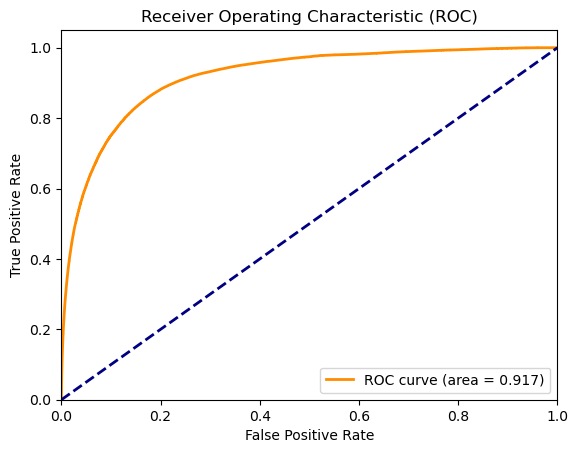

In [28]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

PRECISION , RECALL , F1 SCORE 

In [45]:
from sklearn.metrics import precision_recall_curve, auc

In [48]:
precision, recall, thresholds = precision_recall_curve(y_true_flat, y_pred_flat)

In [51]:
pr_auc = auc(recall, precision)

In [54]:
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

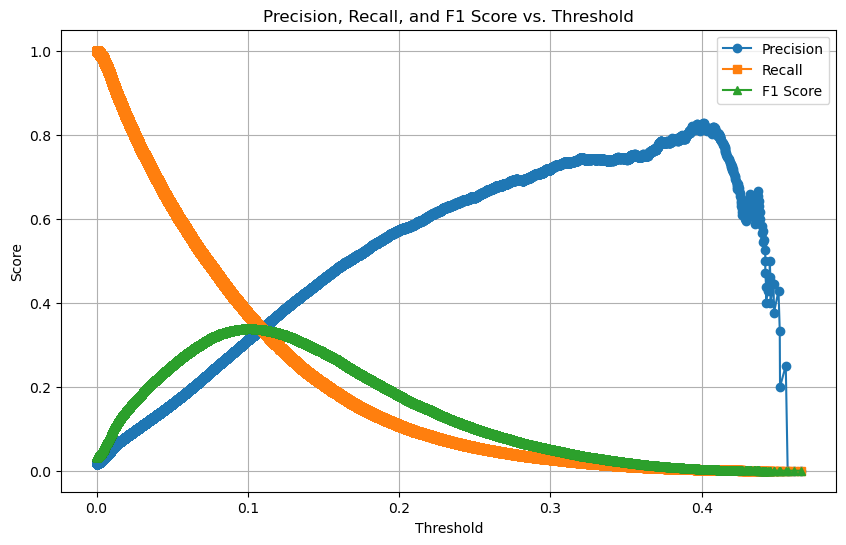

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', marker='o')
plt.plot(thresholds, recall[:-1], label='Recall', marker='s')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid()
plt.show()

PIXEL ACCURACY

In [39]:
y_true_flat = Y_test.flatten()
y_pred_flat = (predictions.flatten() > 0.5).astype(int)

In [42]:
correct_pixels = np.sum(y_true_flat == y_pred_flat)
total_pixels = y_true_flat.size

pixel_accuracy = correct_pixels / total_pixels

print(f"Pixel Accuracy: {pixel_accuracy:.3f}")

Pixel Accuracy: 0.983
